In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.style.use('fivethirtyeight')

# HW_05 - Customer wait time

In the [waiting for bus](./bus_wait.ipynb) example, we saw a difference between how long we expect the bus interval to be vs how long we _experience_ a bus interval to be.

Now, consider creating parts on demand for customers. We'll take an example of [folding a paper airplane](https://hackmd.io/@cooperrc/HkISHYNrC/edit). We need some data to start:

1. Follow the paper airplane instructions and make one airplane
2. Edit the instructions to make it easier to follow
3. With your new process: time yourself making one airplane at-a-time and make 5 or 6 airplanes
4. With one hand, try to make a paper airplane and time the process (time process this at least 2 times)

## What is this data meant to show

We, engineers, often prescribe processes and procedures that seem to make sense, but can ignore the people that need to do the work. The process of create-try-edit-repeat should be an integral part of your writing and design process. The one-handed folding procedure could simulate many scenarios:
- someone multitasking
- someone with an injury/unuseable hand
- anything else?

When we consider a process, its important to think about the different people that are required to make the process happen.

## Next steps

With your times recorded, you can use the average and standard deviations to find the times when parts will be ready as a function of time. Use the difference between the predicted and observed cumulative distribution functions to  predict how long your customers will have to wait on paper airplanes.

Text(0.5, 0, 'Two handed time between paper airplanes (sec)')

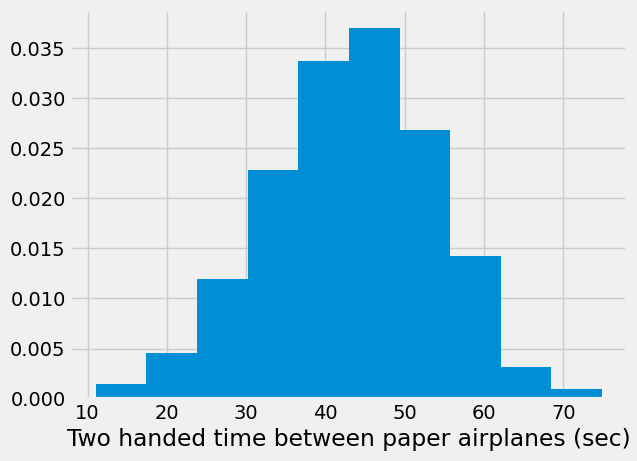

In [10]:
N_assemblies = 1000

time_two_hand = np.array([54,45,51,37,41,31])


two_avg_part_time = np.mean(time_two_hand)

two_part_ready = np.arange(1, N_assemblies+1)*two_avg_part_time

rng = default_rng(42)

two_std_part_time = np.std(time_two_hand)

two_part_ready += rng.normal(loc = 0,
                         scale = two_std_part_time,
                         size = N_assemblies)

plt.hist(np.diff(two_part_ready), density=True)
plt.xlabel('Two handed time between paper airplanes (sec)')

Text(0.5, 0, 'One handed time between paper airplanes (sec)')

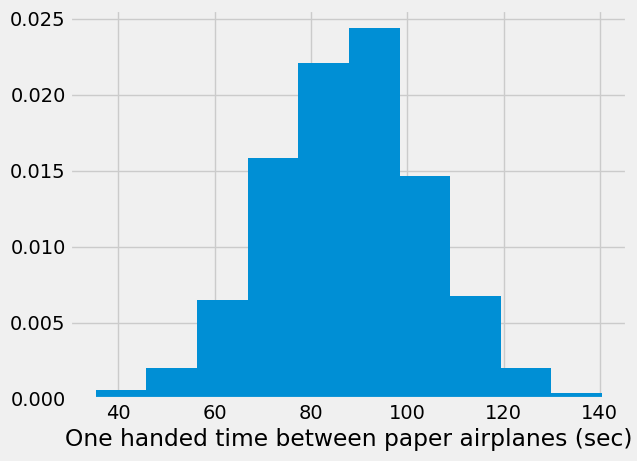

In [11]:
N_assemblies = 1000

time_one_hand = np.array([105,97,85,72,78,89]) #  seconds to make a paper airplane with one hand


one_avg_part_time = np.mean(time_one_hand)

one_part_ready = np.arange(1, N_assemblies+1)*one_avg_part_time

rng = default_rng(55)

one_std_part_time = np.std(time_one_hand)

one_part_ready += rng.normal(loc = 0,
                         scale = one_std_part_time,
                         size = N_assemblies)

plt.hist(np.diff(one_part_ready), density=True)
plt.xlabel('One handed time between paper airplanes (sec)')

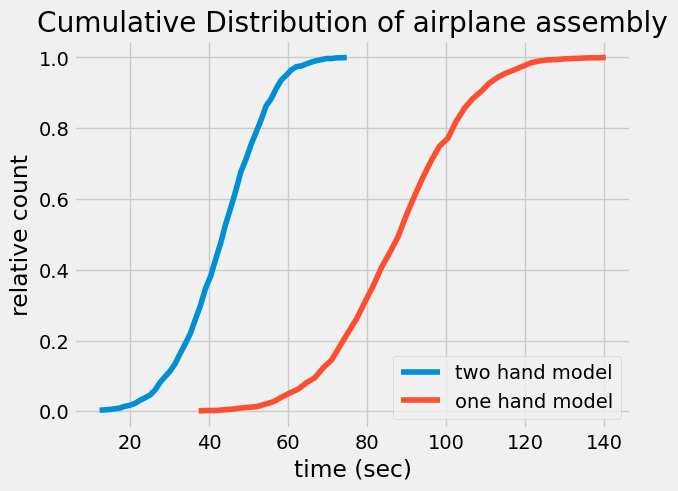

In [8]:
count, bins_count = np.histogram(np.diff(two_part_ready),
                                 bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf,
         label = 'two hand model')

count, bins_count = np.histogram(np.diff(one_part_ready),
                                 bins=50)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf,
         label = 'one hand model')
plt.legend();
plt.title('Cumulative Distribution of airplane assembly')
plt.xlabel('time (sec)')
plt.ylabel('relative count');

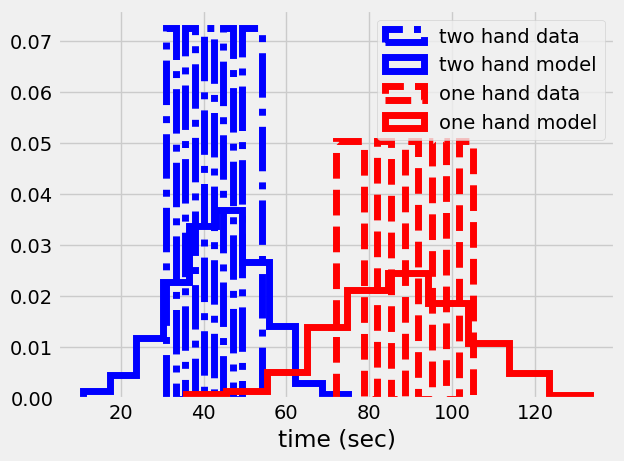

In [9]:
plt.hist(time_two_hand,
         histtype = 'step',
         linewidth = 5,
         density = True,
         linestyle ='-.',
         color = 'b',
         label = 'two hand data')

rng = default_rng(42)

N_builds = 1000

two_part_ready = np.arange(1, N_builds+1)*np.mean(time_two_hand)

two_part_ready += rng.normal(loc = 0,
                           scale = np.std(time_two_hand),
                           size = N_builds)
two_part_ready = np.sort(two_part_ready)

plt.hist(np.diff(two_part_ready),
         density=True,
         histtype = 'step',
         linewidth = 5,
         color = 'b',
         label = 'two hand model')

plt.xlabel('time (sec)')
plt.hist(time_one_hand,
         histtype = 'step',
         linewidth = 5,
         density = True,
         linestyle ='--',
         color = 'r',
         label = 'one hand data')

one_part_ready = np.arange(1, N_builds+1)*np.mean(time_one_hand)

one_part_ready += rng.normal(loc = 0,
                           scale = np.std(time_one_hand),
                           size = N_builds)
one_part_ready = np.sort(one_part_ready)

plt.hist(np.diff(one_part_ready),
         histtype = 'step',
         density=True,
         linewidth = 5,
         color = 'r',
         label = 'one hand model')
plt.legend();

Regarding the predicted vs observed outcomes where the predicted values are based on the model above, in this case the predicted values are heavily towards the center of the distribution. This is mainly because of the lack of trials and due to the fact it was the same person(me) making all the paper airplanes leading to the values being somewhat similar to one another. When looking at the data set you gave where we incorperated everyones data, since there are varying efforts or abilities when making the planes the data is much less consistent. In that case, the model predicts most of the values at the mean and has a normal distribution similar to here. Although they differ due to the fact that there is a larger variety of values, some high and some low. This makes it so that many of the values in that instance were on the more scewed portion of the distribution rather than centered like my graph. Also, the class data set uses more values allowing for a larger variety of potential outliers.

The class data set relates to the bus stop example because in that instance there are many different bus drivers similar to how there were many different people making the planes. There is also a larger data set to view for both of these cases compared to my 6 airplanes per grouping. This makes it so the values of the paper airplanes are skewed to one side or another of the normal distribution and aren't the same as the "expected" time to make a paper airplane represented by the mean. Similarly, the bus stop example expected the busses to arrive at specific increments where they are perceived to be inaccurate. For example, if a bus is supposed to come every 30 minutes, it could arrive in 15mins or in 45mins which leans towards the end of the distribution. Since each of these are a possibility the average or "expected" arrival ends up being as the noted 30 mins.

For the one-handed paper airplane, it is predicted that the customer will have to wait on average a minute and a half, potentially receiving airplanes ranging from one minute to two minutes. As for the two-handed scenario the airplane is expected to take around 45-50 seconds where it could potentially take 20 seconds to a minute do to the variation.




1) Fold the paper vertically, crease a piece of letter-sized paper in half lengthwise.

Get a piece of printer paper that’s a rectangle and lay it on a flat surface. Fold the paper in half lengthwise so the paper looks like a long rectangle, meeting the left edge of the paper to the right edge.

Crease the fold with your fingernail before unfolding the paper again.

Unfold the paper and lay it flat again—this crease will serve as a guideline for the next steps.


2) Fold the top Corners in:

Take the top-left corner and fold it diagonally toward the center crease, aligning the edge with the guideline you created in Step 1. This forms a right triangle at the top.

Press along the fold with your fingernail so the fold stays in place.

Repeat this with the top-right corner, folding it and lining it up along the center crease as well.

After both folds, the top of your paper should now form a pointed tip, resembling a house shape.


3) Take the newly formed top-left slanted edge and fold it inward again, aligning it with the center crease. This will create a long, narrower triangle

Run your fingernail across the fold to secure it in place.

Fold the other top corner in the same way so your piece of paper looks like a large triangle, still containing a sharp tip at the top.

4) Fold the paper along the centerline once again, using the first crease you made as a guide for making your next fold.
Fold the paper in half along this crease, bringing the two symmetrical sides together.

Ensure that the folded edges remain on the inside, with the sharp nose of the plane pointing outward. It should now look like a long right triangle with a small rectangle connected to the end away from the point.

Slide your fingernail across the crease so the fold stays in place.

5) Keeping the paper folded in half, take one of the angled edges and fold it downward, aligning it with the bottom edge of the airplane’s body. This creates the first wing.

Crease the paper with your knuckle or fingernail to secure the fold. Flip the paper airplane over to create the wing on the other side in the same way as the first wing. Make sure the top of the first wing is in line with the top of the second.

Once both sides are creased, unfold them slightly so the plane is flat on top, making a perpendicular shape from the wings to the plane itself.
